## Health Insurance Cross Sell Prediction

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

## Variable	Definition
1. id:- 	Unique ID for the customer
2. Gender:-	Gender of the customer
3. Age:-	Age of the customer
4. Driving_License:-	0 : Customer does not have DL, 1 : Customer already has DL
5. Region_Code:-	Unique code for the region of the customer
6. Previously_Insured:- 	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
7. Vehicle_Age:-	Age of the Vehicle
8. Vehicle_Damage:-	1 : Customer got his/her vehicle damaged in the past; 0 : Customer didn't get his/her vehicle damaged in the past.
9. Annual_Premium:-	The amount customer needs to pay as premium in the year
10. PolicySalesChannel:-	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
11. Vintage:-	Number of Days, Customer has been associated with the company
12. Response:-	1 : Customer is interested, 0 : Customer is not interested

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv(r"C:\Users\HP\Desktop\KOMAL\DATA\train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
train.shape

(381109, 12)

In [5]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
duplicate=train[train.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []


In [7]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
train['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [9]:
train['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

<AxesSubplot:xlabel='Response', ylabel='count'>

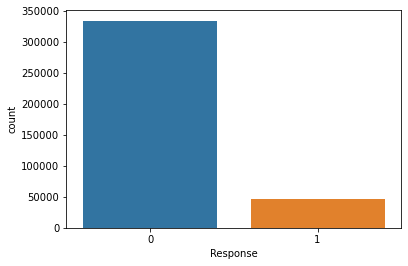

In [10]:
sns.countplot(train.Response)

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

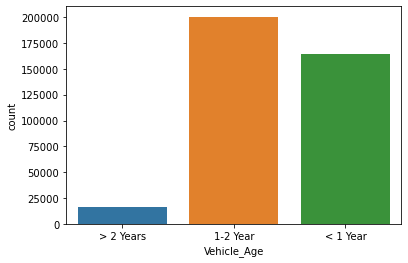

In [11]:
sns.countplot(train.Vehicle_Age)

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

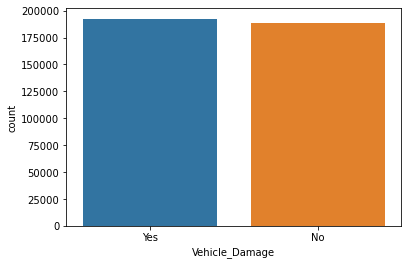

In [12]:
sns.countplot(train.Vehicle_Damage)

In [13]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


#### from above description we can see that annual_premium contains outliers as its max value is far away from mean value

In [14]:
train.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


<AxesSubplot:xlabel='Annual_Premium'>

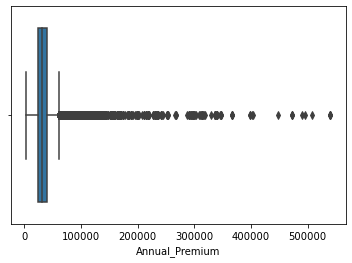

In [15]:
sns.boxplot(train.Annual_Premium)

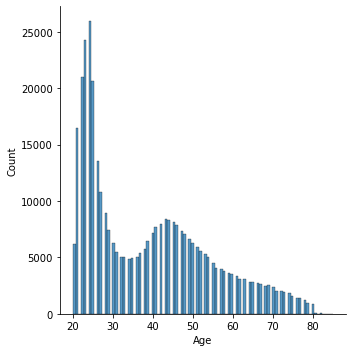

In [16]:
sns.displot(train.Age)

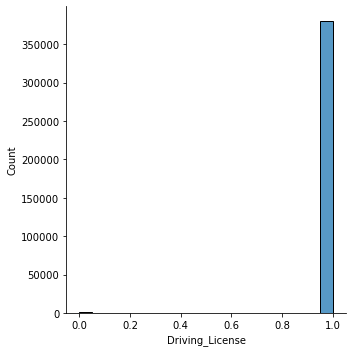

In [17]:
sns.displot(train.Driving_License)

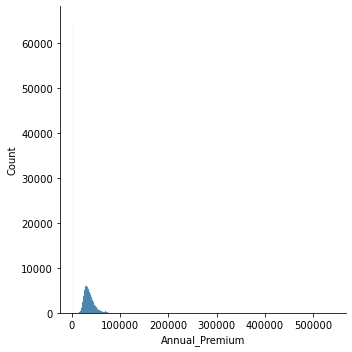

In [18]:
sns.displot(train.Annual_Premium)

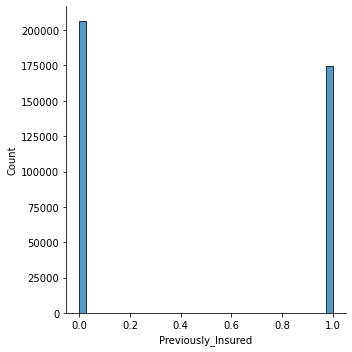

In [19]:
sns.displot(train.Previously_Insured)

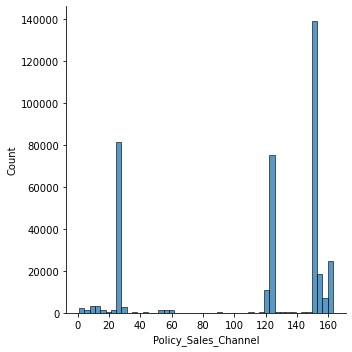

In [20]:
sns.displot(train.Policy_Sales_Channel)

#### replacing outliers using percentile

In [21]:
train['Annual_Premium']=np.where(train['Annual_Premium']>train['Annual_Premium'].quantile(0.99),train['Annual_Premium'].quantile(0.99),train['Annual_Premium'])


In [22]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30338.717275,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,15916.679308,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,72963.000000,163.000000,299.000000,1.000000


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## Encoding categorical data

In [24]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'.
train['Gender']= label_encoder.fit_transform(train['Gender']) 
train['Vehicle_Age']= label_encoder.fit_transform(train['Vehicle_Age']) 
train['Vehicle_Damage']= label_encoder.fit_transform(train['Vehicle_Damage']) 


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int32  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int32  
 7   Vehicle_Damage        381109 non-null  int32  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int32(3), int64(6)
memory usage: 30.5 MB


In [26]:
train.astype(float)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1.0,1.0,44.0,1.0,28.0,0.0,2.0,1.0,40454.0,26.0,217.0,1.0
1,2.0,1.0,76.0,1.0,3.0,0.0,0.0,0.0,33536.0,26.0,183.0,0.0
2,3.0,1.0,47.0,1.0,28.0,0.0,2.0,1.0,38294.0,26.0,27.0,1.0
3,4.0,1.0,21.0,1.0,11.0,1.0,1.0,0.0,28619.0,152.0,203.0,0.0
4,5.0,0.0,29.0,1.0,41.0,1.0,1.0,0.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105.0,1.0,74.0,1.0,26.0,1.0,0.0,0.0,30170.0,26.0,88.0,0.0
381105,381106.0,1.0,30.0,1.0,37.0,1.0,1.0,0.0,40016.0,152.0,131.0,0.0
381106,381107.0,1.0,21.0,1.0,30.0,1.0,1.0,0.0,35118.0,160.0,161.0,0.0
381107,381108.0,0.0,68.0,1.0,14.0,0.0,2.0,1.0,44617.0,124.0,74.0,0.0


#### normalizing data using minmax scaler

In [27]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
new_x= min_max_scaler.fit_transform(train) 
new_train=pd.DataFrame(new_x,columns=train.columns)

In [28]:
new_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0.000000,1.0,0.369231,1.0,0.538462,0.0,1.0,1.0,0.537785,0.154321,0.716263,1.0
1,0.000003,1.0,0.861538,1.0,0.057692,0.0,0.0,0.0,0.439424,0.154321,0.598616,0.0
2,0.000005,1.0,0.415385,1.0,0.538462,0.0,1.0,1.0,0.507073,0.154321,0.058824,1.0
3,0.000008,1.0,0.015385,1.0,0.211538,1.0,0.5,0.0,0.369514,0.932099,0.667820,0.0
4,0.000010,0.0,0.138462,1.0,0.788462,1.0,0.5,0.0,0.353547,0.932099,0.100346,0.0


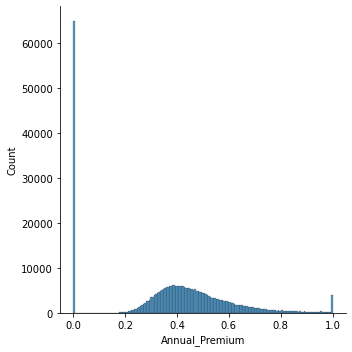

In [29]:
sns.displot(new_train.Annual_Premium)

In [30]:
y=new_train['Response']
x=new_train.drop(['Response','id'],axis=1)

Original dataset shape Counter({0.0: 334399, 1.0: 46710})
Resampled dataset shape Counter({1.0: 334399, 0.0: 334399})


<AxesSubplot:xlabel='Response', ylabel='count'>

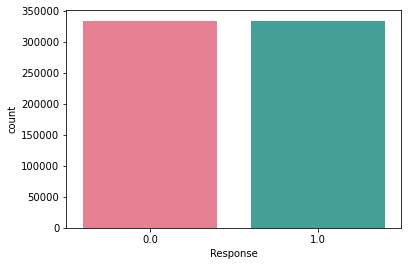

In [31]:
from imblearn.over_sampling import RandomOverSampler
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(x,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=0)

In [33]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(classifier,x_train,y_train):
    classifier.fit(x_train,y_train)
    print("Accuracy is",classifier.score(x_test,y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(classifier, x_train, y_train, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [34]:
from sklearn.linear_model import LogisticRegression
lg_classifier = LogisticRegression()
classify(lg_classifier, x_new,y_new)

Accuracy is 78.33791866028707
Cross validation is 78.44072519996061


In [35]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier()
classify(DT_classifier, x_new,y_new)

Accuracy is 99.98983253588517
Cross validation is 94.35434911910055


In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
classify(rf_classifier, x_new,y_new)

Accuracy is 99.98923444976077
Cross validation is 94.99235959496855


#### according to crossvalidation score we select random forest model

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rf_classifier.predict(x_test)

In [39]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = rf_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[83653,    18],
       [    0, 83529]], dtype=int64)

#### 

<AxesSubplot:>

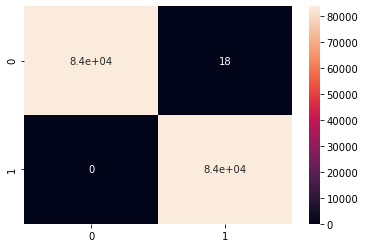

In [40]:
sns.heatmap(cm, annot=True)

In [41]:
test=pd.read_csv(r"C:\Users\HP\Desktop\KOMAL\DATA\test.csv")

In [42]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [43]:
test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


In [44]:
test.shape

(127037, 11)

In [45]:
test['Annual_Premium']=np.where(test['Annual_Premium']>test['Annual_Premium'].quantile(0.99),test['Annual_Premium'].quantile(0.99),test['Annual_Premium'])


In [46]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'.
test['Gender']= label_encoder.fit_transform(test['Gender']) 
test['Vehicle_Age']= label_encoder.fit_transform(test['Vehicle_Age']) 
test['Vehicle_Damage']= label_encoder.fit_transform(test['Vehicle_Damage']) 


In [47]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
new_x= min_max_scaler.fit_transform(test) 
new_test=pd.DataFrame(new_x,columns=test.columns)

In [48]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  float64
 1   Gender                127037 non-null  float64
 2   Age                   127037 non-null  float64
 3   Driving_License       127037 non-null  float64
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  float64
 6   Vehicle_Age           127037 non-null  float64
 7   Vehicle_Damage        127037 non-null  float64
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  float64
dtypes: float64(11)
memory usage: 10.7 MB


In [49]:
X=new_test.drop(['id'],axis=1)

In [50]:
test_pred=rf_classifier.predict(X)

In [51]:
test_pred

array([0., 1., 0., ..., 0., 0., 0.])

In [52]:
df= pd.DataFrame({'cust_id': test.id , 'Predicted class': test_pred})
df

,cust_id,Predicted class
0,381110,0.0
1,381111,1.0
2,381112,0.0
3,381113,0.0
4,381114,0.0
...,...,...
127032,508142,0.0
127033,508143,0.0
127034,508144,0.0
127035,508145,0.0


In [53]:
df.to_csv(r"C:\Users\HP\Desktop\KOMAL\output\result.csv", index= False)